---

# Taller: Algoritmo de Interpolación

Carolina Álvarez Pereira,  
Jesús Manuel Gallego Mercado,  
Luis Miguel Patiño Buendía.

---

Crear un programa que ejecute el método de interpolación de Newton para un conjunto de datos introducidos por el usuario y resolver lo siguiente:

1. Estime el logaritmo en base 10 de 10 por medio de interpolación lineal.

    1.1. Interpole entre log 8 = 0.9030900 y log 12 = 1.0791812.
    
    1.2. Interpole entre log 9 = 0.9542425 y log 11 = 1.0413927.

Calcule el error relativo porcentual verdadero para cada interpolación. 

2. Ajuste un polinomio de interpolación de Newton de segundo orden para estimar el log 10, con los datos anteriores en x = 8, 9 y 11. Calcule el error relativo porcentual verdadero.

3. Ajuste un polinomio de interpolación de Newton de orden tres con los cuatro puntos dados anteriormente, estime de nuevo el log 10 y calcule el respectivo error relativo porcentual verdadero.

## Código:

1. Establecemos las librerías o módulos de utilidad: 

In [1]:
import math as mt
import numpy as np

import matplotlib.pyplot as plt
from pylab import mpl
%matplotlib inline

2. Definimos la subrutina o función
Es importante enfatizar en que el ciclo **for i in range(a,b)** en Python van desde **a**, hasta **b-1**, si así se establece. Con lo cual, establecer B = b + 1, y proporcionar al ciclo el intervalo **[a,B]** corrige este detalle.  

In [2]:
def newInterpolation(x, y, val_x, epsilon=0e-5):
    
    #Comprobamos que la cantidad de datos del vector X, es igual al vector Y:
    if len(x)==len(y):
        
        #Establecemos los n grados de interpolación. La función len(x) nos arroja la longitud del arreglo.
        
        n = len(x) - 1
        N = n + 1
        
        #Imprimimos los vectores X e Y en formato de tabla:
      #  print("--------------------------------------------")
     #   print("Número de puntos:", N, "\n")
     #   print('{:^12}{:^12}{:^12}'.format("i","Xi", "Yi"))
     #   print("--------------------------------------------")
      #  for i in range(0,N):
     #       print('{:^12}{:^12}{:^12}'.format(i, x[i], y[i]))
      #  print("--------------------------------------------\n")
        
        
        #Establecemos la forma de las matrices de las diferencias divididas "fdd", errores absolutos "ea", y los valores de la función para cada grado de interpolación "yint".
        
     #   print("--------------------------------------------")
     #   print("Interpolación para x =", val_x, "\n")
        fdd = np.zeros((N,N))
        ea = np.zeros(N)
        yant = np.zeros(N)
        ypos = 0.0
        xterm = 1.0

        #Asignamos al grado 0 de la matriz de las diferencias divididas,
        # los valores de Yi proporcionados por el usuario.
        for i in range(0,N):
            fdd[i,0] = y[i]
        
        #Calculamos las diferencias divididas para los grados [1,n], y por tanto los
        # coeficientes del polinomio de interpolación de Newton, teniendo en cuenta 
        # el funcionamiento de los ciclos for de Python.
        for j in range(1,N):
            for i in range(0,N-j):
                fdd[i,j] = (fdd[i+1,j-1]-fdd[i,j-1])/(x[i+j] - x[i])
        
        #Asignamos el primer valor de la función para interpolación de grado 0:"
        yant[0] = fdd[0,0]
        
        #print(yant)
        #print(ypos)
        
        #Calculamos los términos del polinomio para grados mayores, utilizando
        # el valor de evaluación val_x proporcionado por el usuario.
        for orden in range(1,N):
            xterm = xterm*(val_x - x[orden-1])
            ypos = yant[orden-1] + fdd[0,orden]*xterm
          #  print("hola",yant[orden-1])
            ea[orden-1] = abs(ypos - yant[orden-1])
            
            #Establecemos un criterio de paro para cierta tolerancia:
            if(ea[orden-1] <= epsilon): 
                break
            
            yant[orden] = ypos
        
        #Imprimimos los valores de la función para cada grado de interpolación
        # con su error respectivo:
        #print('{:^12}{:^12}{:^12}'.format("GRADO","F(x)", "ERROR"))
        #print("--------------------------------------------")
        #for i in range(0,N):
        #    print('{:^12}{:^12}{:^12}'.format(i, yant[i], ea[i]))
        #print("--------------------------------------------\n")
        
        #El valor de la función evaluada en X, obtenido por interpolación es:
       # print("F"+"("+str(val_x)+")"+" =", ypos)
        return ypos

In [3]:
X=[1,4,6]
Y=[0,1.3863,1.7918]
xs = np.linspace(np.min(X),np.max(X),1000,endpoint=True)
ys=[]

for x in xs:
    ys.append(newInterpolation(X,Y,x))
    
X0=[1,4]
Y0=[0,1.3863]
xs0=np.linspace(np.min(X0),np.max(X0),1000,endpoint=True)
ys0=[]

for x0 in xs0:
    ys0.append(newInterpolation(X0,Y0,x0))
    

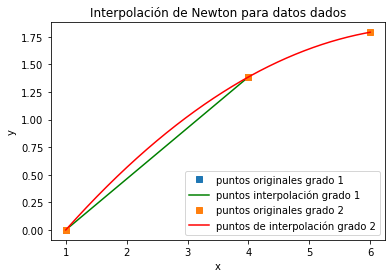

In [4]:
#plt.plot(x, y_2, marker='+',color='darkblue',linestyle='-.')

plt.title("Interpolación de Newton para datos dados")

plt.plot (X0, Y0, 's', label = "puntos originales grado 1") #El punto azul representa el valor original
plt.plot (xs0, ys0, 'g', label = 'puntos interpolación grado 1') # Curva de interpolación

plt.plot (X, Y, 's', label = "puntos originales grado 2") #El punto azul representa el valor original
plt.plot (xs, ys, 'r', label = 'puntos de interpolación grado 2') # Curva de interpolación

plt.xlabel('x')  
plt.ylabel('y') 
plt.legend (loc = 4) # Especifique la posición de la leyenda

plt.show()

In [5]:
newInterpolation(X,Y, 5, 0e-5)

1.64092

## Solución 1:

1.1. Para resolver, evaluamos el método anterior con los datos:

\begin{gather*}
x = \begin{bmatrix}
    8\\
    12
    \end{bmatrix}\\
    \quad
y = \begin{bmatrix}
    0.9030900\\
    1.0791812
    \end{bmatrix}\\ 
\end{gather*}

usando como valor de evaluación a $x=10$.

In [6]:
newInterpolation((8,12),(0.9030900,1.0791812),10,0e-5)

0.9911356

De modo que nuestra aproximación usando la interpolación es: $F(10) = 0.9911356$

Y el error relativo porcentual es:

\begin{gather*}
    E_r = \left|\frac{X-x}{X}\right|*100\% = 0.88644 \%
\end{gather*}

1.2. Hacemos lo mismo que antes:

\begin{gather*}
x = \begin{bmatrix}
    9\\
    11
    \end{bmatrix}\\
    \quad
y = \begin{bmatrix}
    0.9542425\\
    1.0413927
    \end{bmatrix}\\ 
\end{gather*}

In [7]:
newInterpolation((9,11),(0.9542425,1.0413927),10,0e-5)

0.9978176000000001

De modo que nuestra aproximación en este caso es: $F(10) = 0.9978176000000001$

\begin{gather*}
    E_r = 0.21824 \%
\end{gather*}

## Solución 2:

Realizamos lo mismo que en el punto anterior para $x=10$, con los siguientes datos:

\begin{gather*}
x = \begin{bmatrix}
    8\\
    9\\
    11
    \end{bmatrix}\\
    \quad
y = \begin{bmatrix}
    0.9030900\\
    0.9542425\\
    1.0413927
    \end{bmatrix}\\ 
\end{gather*}

In [8]:
newInterpolation((8,9,11),(0.9030900,0.9542425,1.0413927), 10, 0e-5)

1.0003434

De modo que nuestra aproximación en este caso es: $F(10) = 1.0003434$

Y el error relativo porcentual es:

\begin{gather*}
    E_r =  0.03434\%
\end{gather*}

## Solución 3:

Realizamos lo mismo que en el punto anterior para $x=10$, con los siguientes datos:

\begin{gather*}
x = \begin{bmatrix}
    8\\
    9\\
    11\\
    12
    \end{bmatrix}\\
    \quad
y = \begin{bmatrix}
    0.9030900\\
    0.9542425\\
    1.0413927\\
    1.0791812
    \end{bmatrix}\\ 
\end{gather*}

In [9]:
newInterpolation((8,9,11,12),(0.9030900,0.9542425,1.0413927,1.0791812), 10, 0e-5)

1.0000449333333334

De modo que nuestra aproximación en este caso es: $F(10) = 1.0000449333333334$

Y el error relativo porcentual es:

\begin{gather*}
    E_r =  4.493333333*10^{-3}\%
\end{gather*}